In [62]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

### Ejercicio 1
Calcular la covarianza del dataset Forest-Fires-Data, considerando las variables wind (velocidad del viento) y rH (porcentaje de humedad relativa).

Graficar su dispercion.

In [59]:
data = pd.read_csv('forestfires.csv')
data.head(5)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [60]:
#covarianza
wind = data['wind']
rH = data['RH']

covarianza = np.cov(wind, rH)

print('La covarianza enter el viento y la humedad relativa es de: ', covarianza[0][1])

La covarianza enter el viento y la humedad relativa es de:  2.0292197082152548


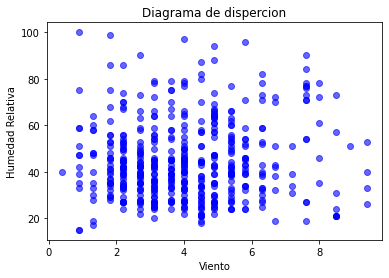

In [90]:
plt.figure()

plt.scatter(wind, rH, marker='o', color = "blue", alpha=0.6)
plt.xlabel('Viento')
plt.ylabel('Humedad Relativa')
plt.title('Diagrama de dispercion')
plt.show()

#### Conclucion
El valor obtenido de la covarianza entre el viendo y la humedad relativa es de 2.029, lo que indica que existe una relacion positiva entre estas dos variable. No obstante, gracias al diagrama de dispercion, se puede justificar el porque el valor de la covarianza es bajo y esto es porque aunque exista una covarianza positiva entre estas 2 variables, la relacion entre ellas es debil,llegando a tener valores en la velocidad de viendo bajos mientras que el porcentaje de de humedad relativa llegan a ser altos y viceversa.

### Ejercicio 2
Calcular el coeficiente de correlacion lineal de Pearson tomando en cuenta las variables wind y rH.

Calcular la regresion lineal.

In [28]:
#correlacion de pearson
pearson = np.corrcoef(wind,rH)
print('El coeficiente de correlacion lineal de Pearson es: ', pearson[0][1])

El coeficiente de correlacion lineal de Pearson es:  0.06941006715607254


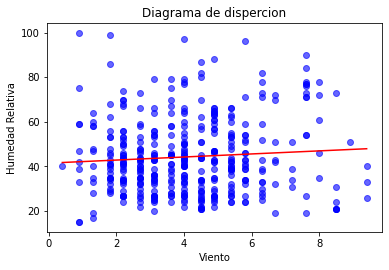

In [103]:
X = data[['wind']]
y = rH

X_train, X_test, y_train, y_test = train_test_split(
                                        X.values.reshape(-1,1),
                                        y.values.reshape(-1,1),
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )


X_train = sm.add_constant(X_train, prepend=True)
modelo = sm.OLS(endog=y_train, exog=X_train,)
modelo = modelo.fit()

# intervalos de confianza para los coeficientes del modelo
modelo.conf_int(alpha=0.05)

# predicciones
predicciones = modelo.get_prediction(exog = X_train).summary_frame(alpha=0.05)
predicciones['x'] = X_train[:, 1]
predicciones['y'] = y_train
predicciones = predicciones.sort_values('x')

fig, ax = plt.subplots(figsize=(6, 3.84))

plt.xlabel('Viento')
plt.ylabel('Humedad Relativa')
plt.title('Diagrama de dispercion')

ax.scatter(predicciones['x'], predicciones['y'], marker='o', color = "blue", alpha=0.6)
ax.plot(predicciones['x'], predicciones["mean"], linestyle='-', color='red')

# ax.plot(predicciones['x'], predicciones["mean_ci_lower"], linestyle='-', color='green')
# ax.plot(predicciones['x'], predicciones["mean_ci_upper"], linestyle='-', color='green')
# ax.fill_between(predicciones['x'], predicciones["mean_ci_lower"], predicciones["mean_ci_upper"], alpha=0.1, color='green')


#### Conclusion
Al obtener el valor del coeficiente de correlaicon de Pearson, logramos observar un valor de 0.0694 lo que significa que que existe una correlacion positiva entre los tados de velocidad de viento con los datos del porcentaje de humedad relativa, no obstante, este valor es cercano a 0, lo que nos indica nuevamente que la relacion entre estas dos variables es realmente pequeña. Esto se lo puede visualizar mediante la grafica de la regresion lineal, donde se muestra que esta regresion es positiva, no obstante la inclinacion es muy pequeña, donde una vez mas se nos indica que estas variables con cuentan con una relacion fuerte.